In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [45]:
df = pd.read_csv(r'C:\Users\GRZEGORZ\OneDrive\Pulpit\kc_house_data.csv')

In [46]:
df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


<br>

In [47]:
df = df.drop(['id'], axis=1)

In [48]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

df = df.drop("date",axis=1)
df.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25


<br>

## Creating models

In [49]:
x = df.iloc[:,1:]
y = df.iloc[:,0:1]
X = x.values
Y = y.values

In [50]:
from sklearn.metrics import r2_score

I will look at the r2_score after creating each model

<br>

### Linear Regression

In [51]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X,Y)

print(f'R² score: {r2_score(Y, linear_regression.predict(X))*100}')

R² score: 70.13496515933248


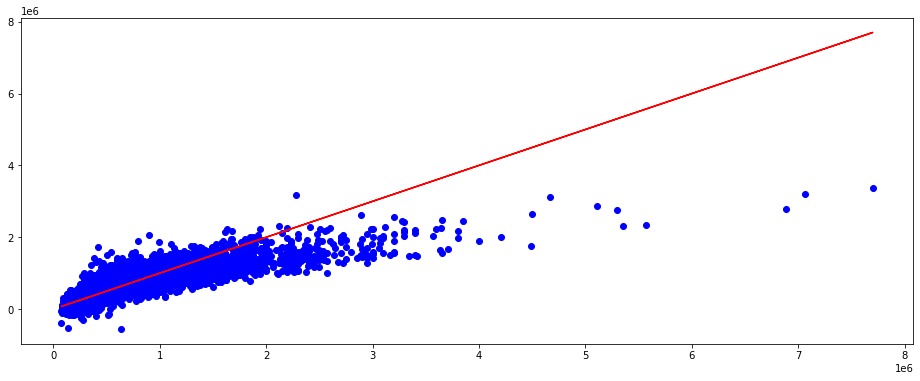

In [52]:
predictArray_lin = linear_regression.predict(X)
plt.figure(figsize=(16,6))
plt.scatter(Y,predictArray_lin, color="b")
plt.plot(Y,Y, color="r")

<br>

### Polynomial Regression

In [53]:
from sklearn.preprocessing import PolynomialFeatures
polnomialy_regression = PolynomialFeatures(degree = 3)
x_poly = polnomialy_regression.fit_transform(X)
linear_regression2 = LinearRegression()
linear_regression2.fit(x_poly,y)

print(f'R² score: {r2_score(Y, linear_regression2.predict(polnomialy_regression.fit_transform(X)))*100}')

R² score: 85.88359000701433


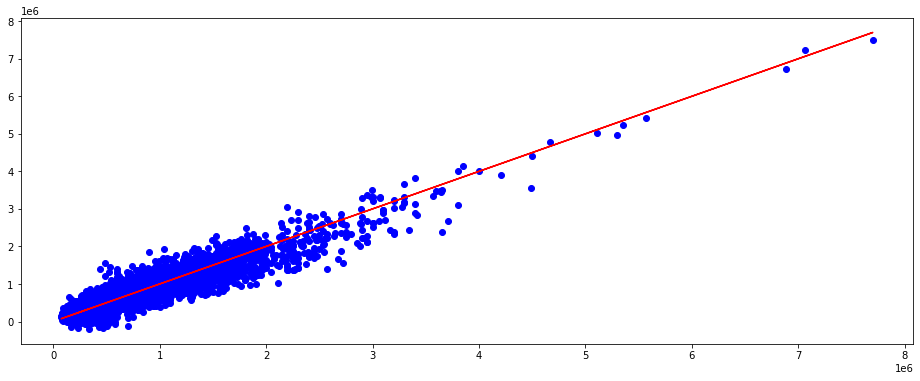

In [54]:
predictArray_poly = linear_regression2.predict(polnomialy_regression.fit_transform(X))
plt.figure(figsize=(16,6))
plt.scatter(Y,predictArray_poly, color="b")
plt.plot(Y,Y, color="r")

<br>

### Decisoin Tree

In [55]:
from sklearn.tree import DecisionTreeRegressor
r_dt = DecisionTreeRegressor(random_state=0)
r_dt.fit(X,Y)

print(f'R² score: {r2_score(Y, r_dt.predict(X))*100}')

R² score: 99.99999992807538


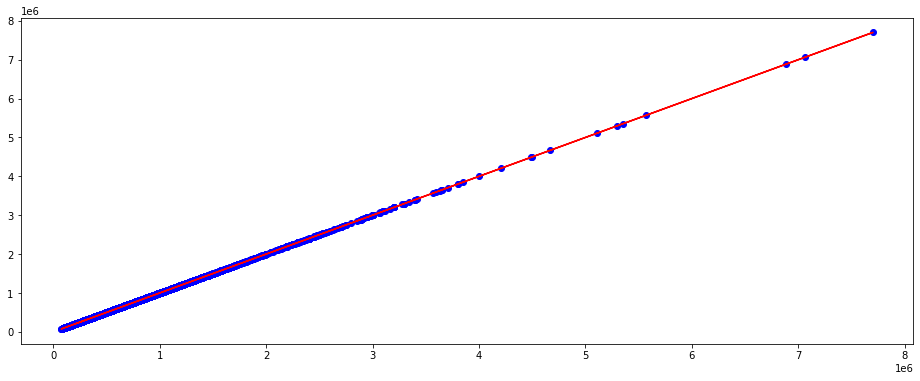

In [56]:
predictArray_dt = r_dt.predict(X)
plt.figure(figsize=(16,6))
plt.scatter(Y,predictArray_dt, color="b")
plt.plot(Y,Y, color="r")

<br>

### Random Forest

In [57]:
from sklearn.ensemble import RandomForestRegressor
rf_reg=RandomForestRegressor(n_estimators = 10,random_state=0)
rf_reg.fit(X,Y.ravel())

print(f'R² score: {r2_score(Y, rf_reg.predict(X))*100}')

R² score: 97.58229767993731


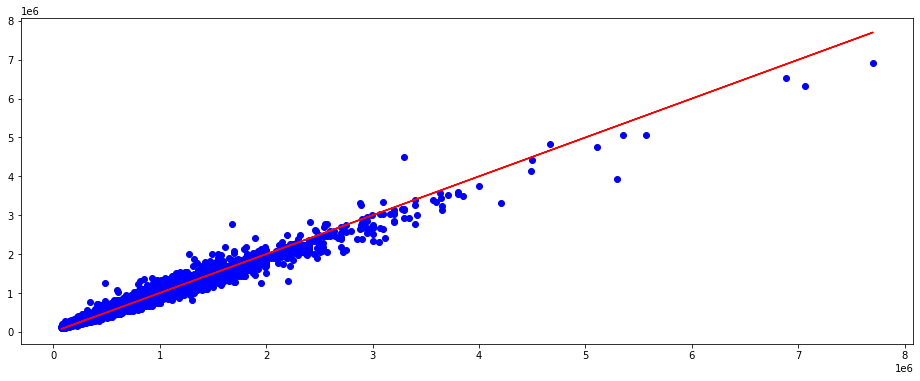

In [58]:
predictArray_rf = rf_reg.predict(X)
plt.figure(figsize=(16,6))
plt.scatter(Y,predictArray_rf, color="b")
plt.plot(Y,Y, color="r")

<br>

## Conclusion

In [59]:
r2_lin = r2_score(Y, linear_regression.predict(X))*100
r2_poly = r2_score(Y, linear_regression2.predict(polnomialy_regression.fit_transform(X)))*100
r2_dt = r2_score(Y, r_dt.predict(X))*100
r2_rf = r2_score(Y, rf_reg.predict(X))*100

Text(0.5, 1.0, 'Random Forest')

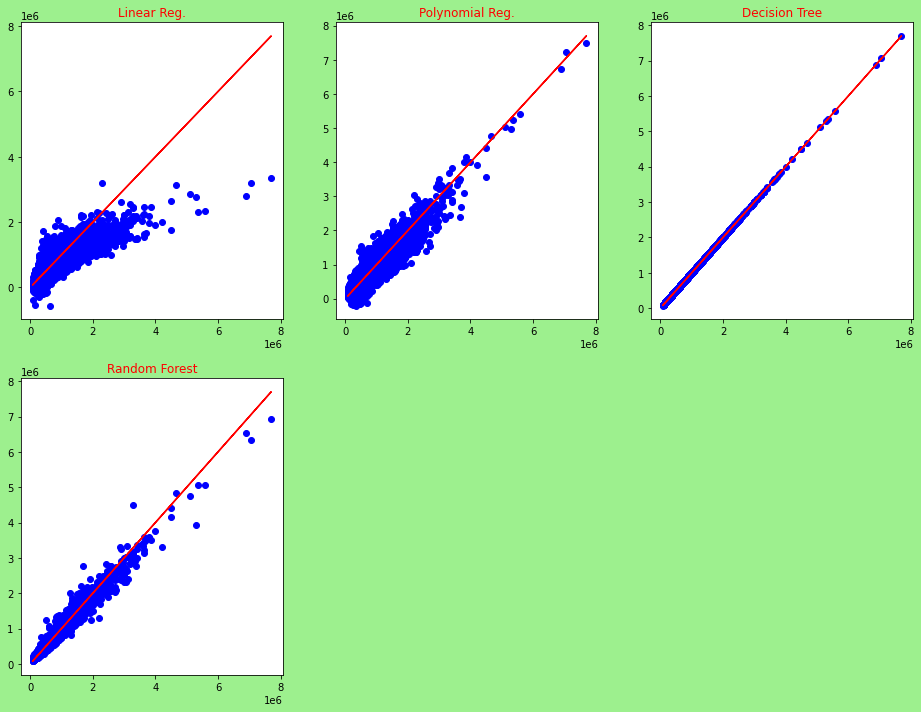

In [60]:
plt.figure(figsize=(16,12),facecolor='#9DF08E')
plt.subplot(2,3,1)
plt.scatter(Y,predictArray_lin, color='b')
plt.plot(Y,Y, color='r')
plt.title('Linear Reg.', color='r')

plt.subplot(2,3,2)
plt.scatter(Y,predictArray_poly, color='b')
plt.plot(Y,Y, color='r')
plt.title('Polynomial Reg.', color='r')

plt.subplot(2,3,3)
plt.scatter(Y,predictArray_dt, color="b")
plt.plot(Y,Y, color='r')
plt.title('Decision Tree', color='r')

plt.subplot(2,3,4)
plt.scatter(Y,predictArray_rf, color="b")
plt.plot(Y,Y, color='r')
plt.title('Random Forest', color='r')

In [61]:
print("------------- R² SCORES OF MODELS ----------------\n")
print(f'Linear Regression R² Score     : {r2_lin}')
print(f'Polynomial Regression R² Score : {r2_poly}')
print(f'Decision Tree R² Score         : {r2_dt}')
print(f'Random Forest R² Score         : {r2_rf}')

------------- R² SCORES OF MODELS ----------------

Linear Regression R² Score     : 70.13496515933248
Polynomial Regression R² Score : 85.88359000701433
Decision Tree R² Score         : 99.99999992807538
Random Forest R² Score         : 97.58229767993731


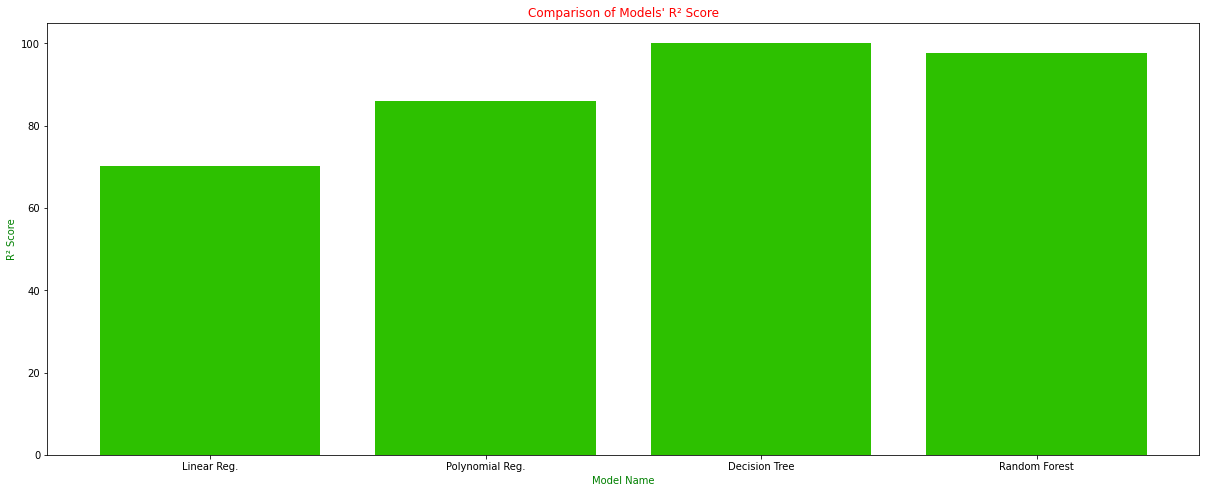

In [62]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparison of Models' R² Score", color='r')
ax.set_xlabel('Model Name', color='g')
ax.set_ylabel('R² Score', color='g')
models_names = ['Linear Reg.', 'Polynomial Reg.', 'Decision Tree', 'Random Forest']
models_r2s = [r2_lin,r2_poly,r2_dt,r2_rf]
ax.bar(models_names, models_r2s,color="#2DC100")
plt.show()

Despite the Decision Tree displaying the highest R² score (99.99%), I am inclined to consider the 'Random Forest' as the most effective model for regression in this dataset. It's worth noting that the Decision Tree algorithm, originally designed for classification, tends to struggle with predicting values between data points in regression tasks. Instead, it primarily estimates values within the dataset. Moreover, considering the mathematical expressions involved in the formulation of the R² score, the excessively high score for the Decision Tree (99.99%) raises questions about its reliability.

Furthermore, when analyzing the variables, 'sqft_living' emerges as the most influential factor affecting the price, evident from its substantial correlation value of +0.70.